# Lung Cancer Risk Prediction Using Random Forest Classifier on Survey Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Dataset ML/survey lung cancer.csv")

In [3]:
data.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [4]:
!pip install missingno
import missingno as msno

<Axes: >

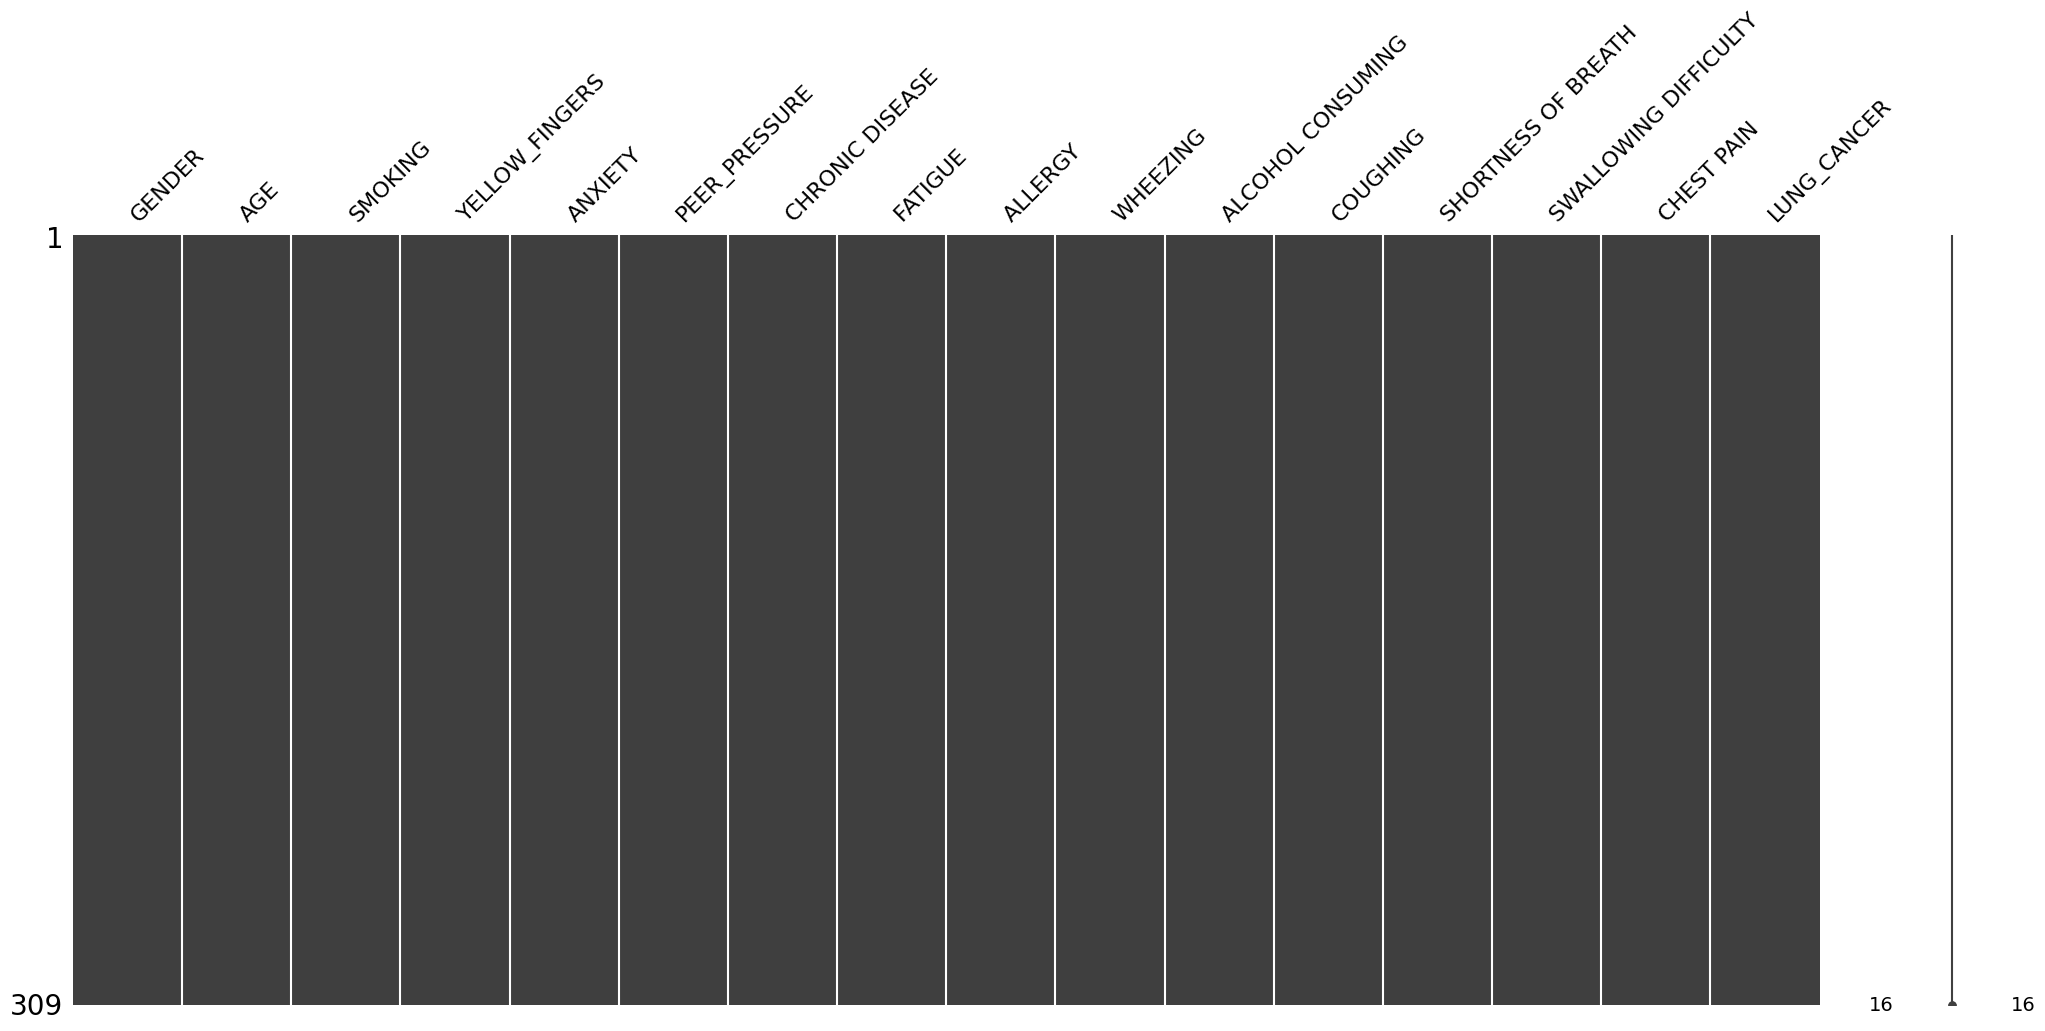

In [5]:
msno.matrix(data)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


<Axes: ylabel='AGE'>

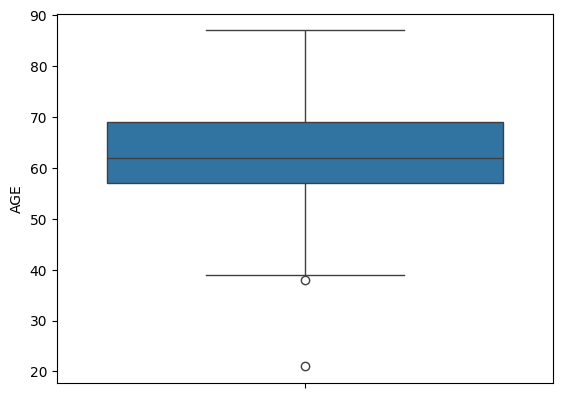

In [7]:
import seaborn as sns
sns.boxplot(data['AGE'])

In [8]:
from scipy.stats import zscore
z_scores = zscore(data['AGE'])
data[np.abs(z_scores)>3]   #common we have to use 3

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
22,0,21,2,1,1,1,2,2,2,1,1,1,2,1,1,0
238,0,38,1,2,1,1,2,2,2,2,1,2,2,1,2,1


In [9]:
x=data.iloc[:,:-1]

In [10]:
y=data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42,n_estimators=1000,n_jobs=-1,max_depth=5,oob_score=False)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.967741935483871

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 0,  0],
       [ 1, 30]])